In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
NSW=pd.read_csv("NSW_Data_Compiled.csv")
NSW.describe()

,DEMAND,RRP,TEMP
count,349697.000000,349697.000000,349697.000000
mean,8328.122659,48.425369,18.370001
std,1356.726210,175.284737,4.932077
min,4650.291670,-264.310000,3.700000
25%,7334.713330,23.240000,14.800000
50%,8308.151670,32.730000,18.600000
75%,9252.141670,52.860000,21.900000
max,14579.860000,14000.000000,45.100000


in this data, it clearly shows thhat the temperture of NSW ranges from minimum of 3.7 degree, to maximum 45.1 degree.

In [64]:
NSW.corr()

,DEMAND,RRP,TEMP
DEMAND,1.000000,0.132629,0.086986
RRP,0.132629,1.000000,0.052422
TEMP,0.086986,0.052422,1.000000


In [65]:
NSW_1 = NSW.set_index(pd.to_datetime(NSW["date"]))


NSW_1 = NSW_1.drop(columns=["date"])

print(NSW_1.index)

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 01:30:00',
               '2000-01-01 02:00:00', '2000-01-01 02:30:00',
               '2000-01-01 03:00:00', '2000-01-01 03:30:00',
               '2000-01-01 04:00:00', '2000-01-01 04:30:00',
               '2000-01-01 05:00:00', '2000-01-01 05:30:00',
               ...
               '2019-12-31 19:30:00', '2019-12-31 20:00:00',
               '2019-12-31 20:30:00', '2019-12-31 21:00:00',
               '2019-12-31 21:30:00', '2019-12-31 22:00:00',
               '2019-12-31 22:30:00', '2019-12-31 23:00:00',
               '2019-12-31 23:30:00', '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=349697, freq=None)


In [66]:
morning_data = NSW_1[pd.Timestamp("2000-01-01 01:00:00"):pd.Timestamp("2000-01-02 00:00:00")]
morning_data.isna().any()
print(morning_data)

                         DEMAND    RRP  TEMP
date                                        
2000-01-01 01:00:00  6386.10167  14.06  17.4
2000-01-01 01:30:00  5990.79500  14.30  16.8
2000-01-01 02:00:00  5655.97667  14.28  16.5
2000-01-01 02:30:00  5283.83667  14.17  16.4
2000-01-01 03:00:00  5047.90167  10.87  16.3
2000-01-01 03:30:00  4848.14500   5.43  16.2
2000-01-01 04:00:00  4719.80333   5.32  15.4
2000-01-01 04:30:00  4689.79000   5.14  15.2
2000-01-01 05:00:00  4650.29167   5.67  14.8
2000-01-01 05:30:00  4650.44333   4.81  15.0
2000-01-01 06:00:00  4705.27000   4.80  15.3
2000-01-01 06:30:00  4747.39000   4.85  15.6
2000-01-01 07:00:00  4891.41667  11.46  15.8
2000-01-01 07:30:00  5095.20833  12.97  16.1
2000-01-01 08:00:00  5304.57667  13.58  16.5
2000-01-01 08:30:00  5616.03333  13.36  16.9
2000-01-01 09:00:00  5826.70833  14.21  17.2
2000-01-01 09:30:00  5926.77333  12.65  17.7
2000-01-01 10:00:00  6057.14333  14.20  18.3
2000-01-01 10:30:00  6046.10667  14.16  18.8
2000-01-01

<AxesSubplot:xlabel='date'>

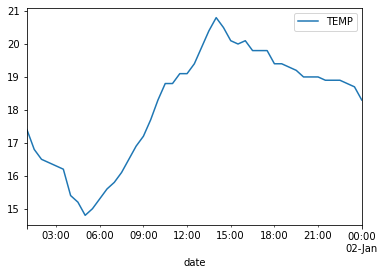

In [67]:
start = pd.Timestamp("2000-01-01 01:00:00")
end = start + pd.Timedelta(hours=23)
a=morning_data.loc[start:end, ["TEMP"]]
a.plot.line()

<AxesSubplot:xlabel='date'>

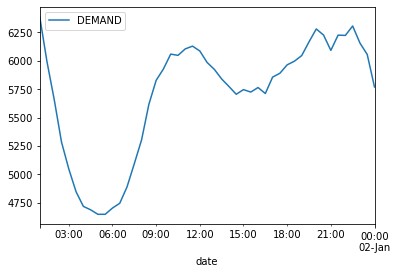

In [68]:
start = pd.Timestamp("2000-01-01 01:00:00")
end = start + pd.Timedelta(hours=23)
a=morning_data.loc[start:end, ["DEMAND"]]
a.plot.line()

<AxesSubplot:title={'center':'New South Wales Energy Demand'}, xlabel='date'>

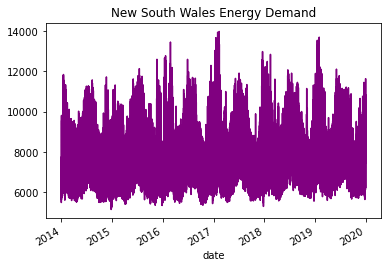

In [69]:
NSW_1["DEMAND"]["2014":"2019"].plot(color= "purple",title="New South Wales Energy Demand")


/var/folders/8s/9tq1cw9n5p9ctt215htgjcw40000gn/T/ipykernel_46312/1037530117.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  NSW_1["TEMP"]["2000":"2019"].plot(color= "red",title="New South Wales Air Temperature");


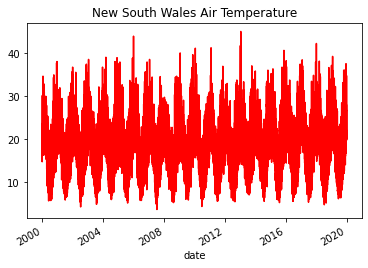

In [70]:
NSW_1["TEMP"]["2000":"2019"].plot(color= "red",title="New South Wales Air Temperature");


<AxesSubplot:title={'center':'New South Wales Energy Demand'}, xlabel='date'>

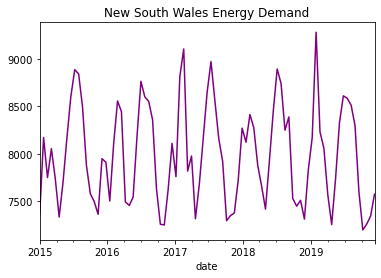

In [71]:
NSW_1.resample("3W").mean()["DEMAND"]["2015":"2019"].plot(color="purple", title="New South Wales Energy Demand")

<AxesSubplot:title={'center':'New South Wales temperture'}, xlabel='date'>

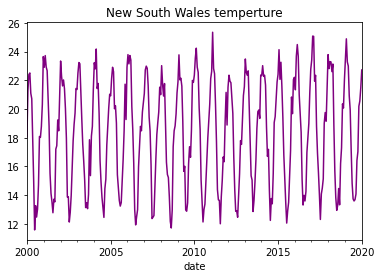

In [72]:
NSW_1.resample("3W").mean()["TEMP"].plot(color="purple", title="New South Wales temperture")

In [73]:
NSW_1.resample("3W").mean()["DEMAND"].describe()

count      349.000000
mean      8320.571715
std        649.277896
min       5810.227039
25%       7834.744153
50%       8283.911617
75%       8746.306131
max      10187.085372
Name: DEMAND, dtype: float64

the mean of the NSW energy demand is in range from minium 5810 to maximum 10431.

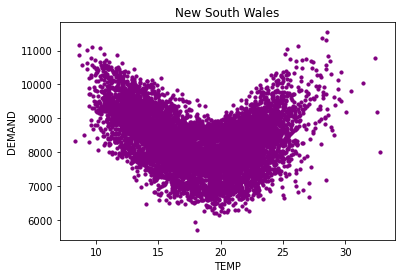

In [74]:
NSW_1.resample("D").mean().plot(kind="scatter",x="TEMP", y="DEMAND", s=10, color= "purple", title="New South Wales");


In [75]:
VIC=pd.read_csv("VIC_Data_Compiled.csv")
VIC.describe()

,DEMAND,RRP,TEMP
count,349440.000000,349440.000000,349440.000000
mean,5484.401953,46.879696,15.945206
std,886.647915,163.978238,5.610528
min,2967.210000,-817.030000,0.800000
25%,4832.877500,21.650000,12.000000
50%,5418.080000,31.920000,15.200000
75%,6120.988750,50.910000,19.000000
max,10414.860000,14500.000000,45.900000


In [76]:
VIC.corr()

,DEMAND,RRP,TEMP
DEMAND,1.000000,0.120500,0.171418
RRP,0.120500,1.000000,0.077767
TEMP,0.171418,0.077767,1.000000


In [77]:
VIC_1 = VIC.set_index(pd.to_datetime(VIC["date"]))


VIC_1 = VIC_1.drop(columns=["date"])

print(VIC_1.index)

DatetimeIndex(['2000-01-01 01:30:00', '2000-01-01 02:00:00',
               '2000-01-01 02:30:00', '2000-01-01 03:00:00',
               '2000-01-01 03:30:00', '2000-01-01 04:00:00',
               '2000-01-01 04:30:00', '2000-01-01 05:00:00',
               '2000-01-01 05:30:00', '2000-01-01 06:00:00',
               ...
               '2019-12-31 19:30:00', '2019-12-31 20:00:00',
               '2019-12-31 20:30:00', '2019-12-31 21:00:00',
               '2019-12-31 21:30:00', '2019-12-31 22:00:00',
               '2019-12-31 22:30:00', '2019-12-31 23:00:00',
               '2019-12-31 23:30:00', '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=349440, freq=None)


<AxesSubplot:title={'center':'Vctoria Energy Demand'}, xlabel='date'>

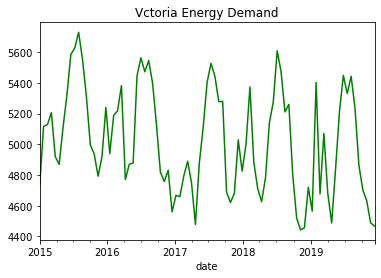

In [80]:
VIC_1.resample("3W").mean()["DEMAND"]["2015":"2019"].plot(color="green", title="Vctoria Energy Demand")

<AxesSubplot:title={'center':'Vctoria Tempertuare'}, xlabel='date'>

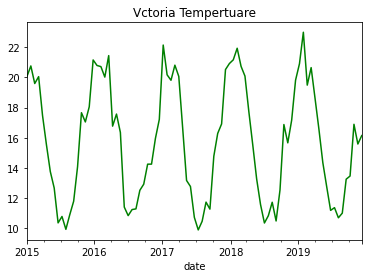

In [81]:
VIC_1.resample("3W").mean()["TEMP"]["2015":"2019"].plot(color="green", title="Vctoria Tempertuare")

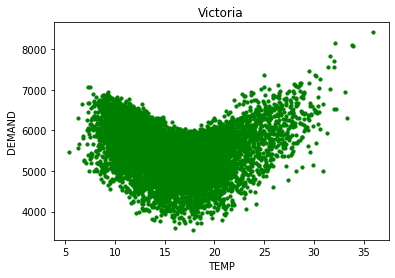

In [82]:
VIC_1.resample("D").mean().plot(kind="scatter",x="TEMP", y="DEMAND", s=10, color= "green", title="Victoria");

In [83]:
#VIC_1.resample("3W")["TEMP"].plot(color="green", title="Vctoria Tempertuare")

In [84]:
# NSW_1[pd.Timestamp("2000-01-01 b01:00:00"):pd.Timestamp("2000-01-02 00:00:00")]

In [85]:
VIC_1.head()

,DEMAND,RRP,TEMP
date,,,
2000-01-01 01:30:00,4599.70167,13.22,13.7
2000-01-01 02:00:00,4478.99000,12.90,13.6
2000-01-01 02:30:00,4228.81000,12.40,13.3
2000-01-01 03:00:00,3989.10000,9.45,14.1
2000-01-01 03:30:00,3783.93167,4.82,13.5


In [86]:
VIC_1=VIC_1[pd.Timestamp("2015-01-01 00:00:00"):pd.Timestamp("2020-01-01 00:00:00")]

In [87]:
VIC_1.shape

(87637, 3)

In [103]:
start = pd.Timestamp("2015-01-01 00:00:00")
end = start + pd.Timedelta(weeks=87)
a=VIC_1.loc[start:end, ["TEMP"]]
rolling_mean = a.rolling('1D').mean()
rolling_mean

,TEMP
date,
2015-01-01 00:00:00,16.700000
2015-01-01 00:30:00,16.650000
2015-01-01 01:00:00,16.600000
2015-01-01 01:30:00,16.375000
2015-01-01 02:00:00,16.280000
...,...
2016-08-31 22:00:00,15.893750
2016-08-31 22:30:00,15.881250
2016-08-31 23:00:00,15.854167


In [99]:

# start = pd.Timestamp("2015-01-01 00:00:00")
# end = start + pd.Timedelta(weeks=87)
# a=VIC_1.loc[start:end, ["TEMP","DEMAND"]]
# b= a.fillna(method='bfill')
# rolling_mean = b.rolling('1D').mean()
# rolling_mean

In [100]:
# plt.plot(a['date'], a['DEMAND']) 
# plt.title('Temp and Demand')

In [105]:
three_sites = VIC_1[["DEMAND"]]


# daily = three_sites.resample("1D").sum() 
daily = three_sites.resample("1D").mean()
daily.head()

,DEMAND
date,
2015-01-01,4252.158958
2015-01-02,5400.250417
2015-01-03,5929.189167
2015-01-04,4347.113125
2015-01-05,4922.175000


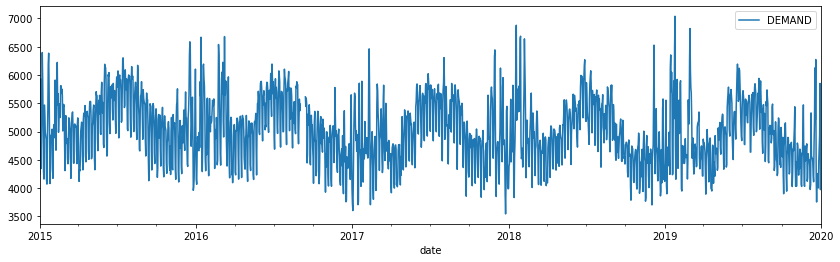

In [106]:
daily.plot.line(figsize=(14,4));

From the graph, we can see that, at the start of a year the energy demand is very hight. One of the reason that it is very hight is because it's in Summer in Australia, which means that the temperture is very high, and people will use air condition to decrease the room temperture, which increase the energy demand. The second reason that the energy demand is higher is lso because it's studeent holiday, which increase the use of energy. After December to January, the energy demand is decrease, since the air temperture is start decrese, and people doesn't ned to open the heater, which decreae the use of energy. The energy demand will keep decrease ustill the Mid-Year of 2015. Because between March to August, Australia enter Winter, which means that the temperture keep decrease, and people need to use heater to keep them self become more comfortable. Due to the use of the aheater, the energy demand will increase very fast. After August the energy demand keep decrease, because the temperture is fine on Spring, and people doesn't need the air condition or heater. The energy demand will increas because it enter summer, and the graph provide the same trend as the 2015 years, since the weather is always the same. 

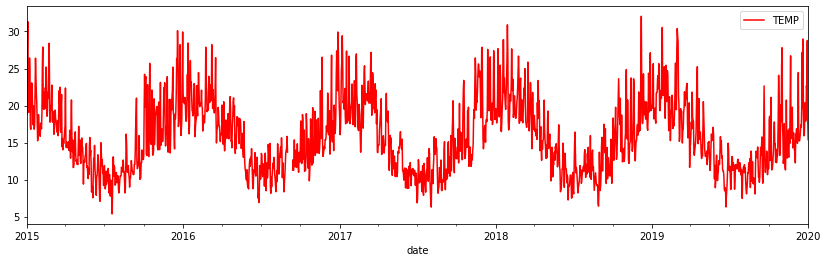

In [118]:
three_sites = VIC_1[["TEMP"]]


# daily = three_sites.resample("1D").sum() 
daily = three_sites.resample("1D").mean()
daily.head()
daily.plot.line(figsize=(14,4),color='red');

the above graph provide the temperture between 2015 to 2020. in the graph, it clearly shows tha in the January of 2015 to March of 2015, it has the higher temperture,, which is 35 Calcium. this graph provide the same thingthat i mention on the previous Demand graph, in January to March, Australia is in Summer, which means the temperture is more higher that the other month, which represents people use more energy demand, since they need to open the air condition. And after March to May, the temperture keep decrese, but the range of the air temperture is between 25-15 Calcium, which means that the temperture is fine for people to live. After May, Australia enter Winter seeason, which represents that the temperture decrease very fast, and the lowerst temperture is 4 Calcium. When Australia enter Winter, the energy demand has strictly increase, which means that people need to open heater. so after the Winter season, which is after august, the temperture of Australia is fine for people to live. the Same situationwill happen after Octorbor, since Australia has enter Summer. The graph will provide the same trent since the season is almost same.

In [107]:
import seaborn as sns

<AxesSubplot:xlabel='TEMP'>

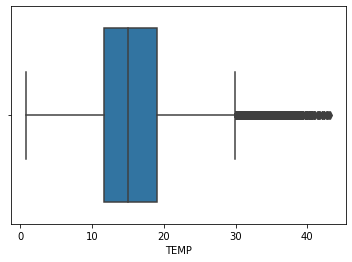

In [113]:
box_1=sns.boxplot(data=VIC_1,x='TEMP')
box_1

<AxesSubplot:xlabel='DEMAND'>

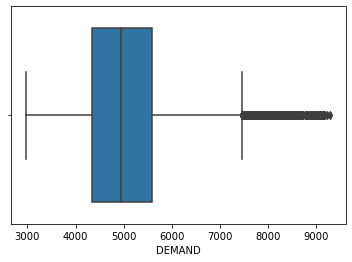

In [114]:
box=sns.boxplot(data=three_sites,x='DEMAND')
box

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.For example, from the victoria data set that we do, which containing two features, TEMP, and Demand. Where Temp ranges from 5-35, while Remand ranges from 3500–7500 and higher. Demand is about 1,00 times larger than Temp and ranges from 3500-7500. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value.